🌤 Weather Forecasting Using Time Series & Machine Learning

This notebook explores weather forecasting using time series analysis and machine learning models on Delhi’s weather data (2013-2017). The goal is to understand trends, seasonality, and patterns in temperature, humidity, wind speed, and pressure.


📍 Key Steps

Exploratory Data Analysis → Visualizing trends, seasonality, and stationarity.

Feature Engineering → Creating lag features to help ML models learn past dependencies.

Time Series Modeling → Applying XGBoost with both Lag Features & Expanding Window.

Model Comparison & Evaluation → Testing Random Forest alongside XGBoost for forecasting accuracy, report RMSE, MAE, and MAPE to compare models



📍 Key Takeaways

✅ XGBoost captures time dependencies well when using Lag Features & Expanding Window.

✅ Random Forest provides an alternative approach but may not handle long-term trends effectively.


In [2]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv
Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest.csv


In [1]:
# Data manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load train and test data
train_df = pd.read_csv("DailyDelhiClimateTrain.csv")
test_df = pd.read_csv("DailyDelhiClimateTest.csv")

# Make 'date' column  datetime format
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Concatenate train and test (temporarily)
full_df = pd.concat([train_df, test_df], axis=0).sort_values(by='date')

In [4]:
full_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1576 non-null   datetime64[ns]
 1   meantemp      1576 non-null   float64       
 2   humidity      1576 non-null   float64       
 3   wind_speed    1576 non-null   float64       
 4   meanpressure  1576 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 73.9 KB


In [6]:
# Set date as index
full_df.set_index("date", inplace=True)

In [7]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1576.0,25.221918,7.345014,6.000000,18.500,27.166667,31.142857,38.714286
humidity,1576.0,60.445229,16.979994,13.428571,49.750,62.440476,72.125000,100.000000
wind_speed,1576.0,6.899262,4.510725,0.000000,3.700,6.363571,9.262500,42.220000
meanpressure,1576.0,1010.593178,175.242704,-3.041667,1001.875,1009.055556,1015.200000,7679.333333


## Plotting Features Over time

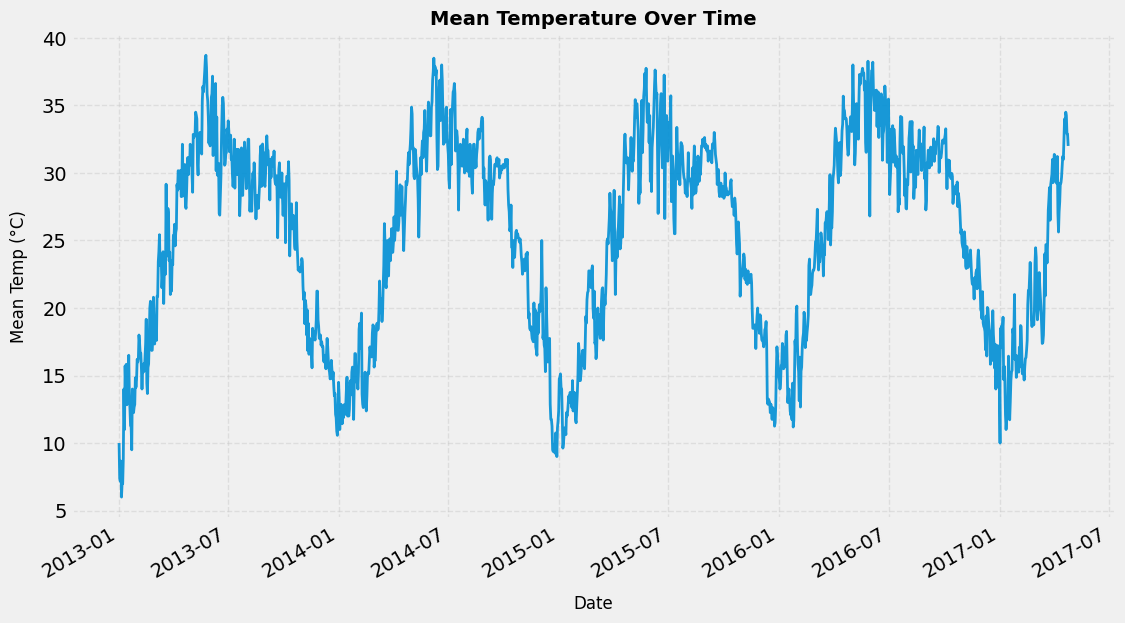

In [8]:

# Apply FiveThirtyEight Style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(full_df["meantemp"], color="C0", linewidth=2, alpha=0.9)

plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Mean Temp (°C)", fontsize=12, labelpad=10)
plt.title("Mean Temperature Over Time", fontsize=14, fontweight="bold")


plt.xticks(rotation=30, ha="right")  # Reduce rotation for readability
plt.grid(linestyle="--", alpha=0.5)  # Make the grid lines lighter
plt.show()


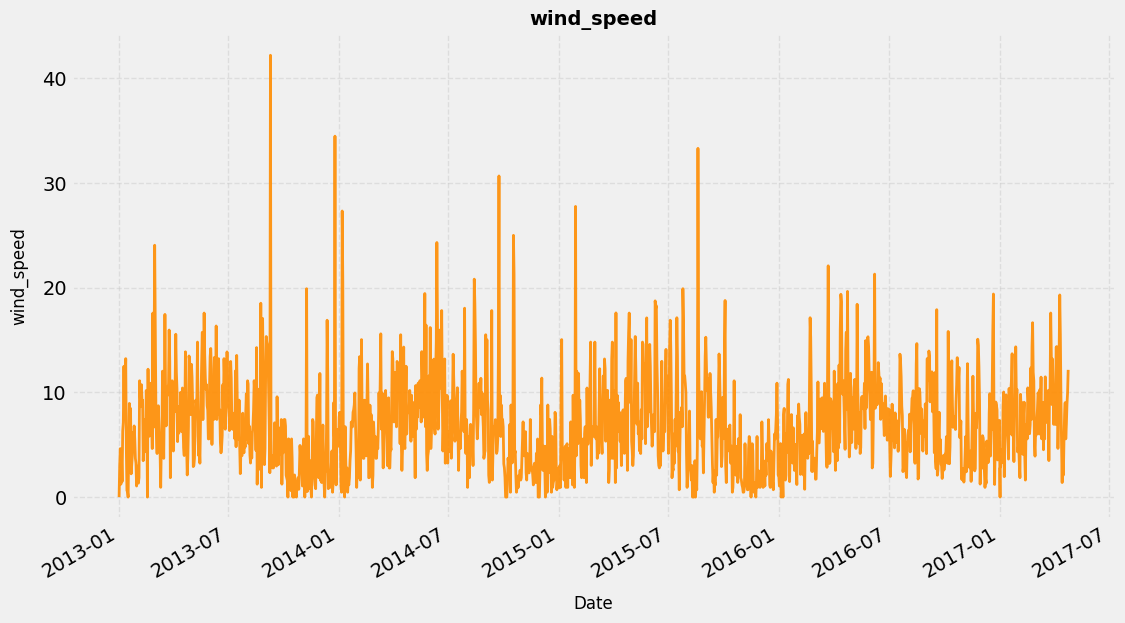

In [9]:
# Apply FiveThirtyEight Style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(full_df["wind_speed"], color="darkorange", linewidth=2, alpha=0.9)

plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("wind_speed", fontsize=12, labelpad=10)
plt.title("wind_speed", fontsize=14, fontweight="bold")


plt.xticks(rotation=30, ha="right")  # Reduce rotation for readability
plt.grid(linestyle="--", alpha=0.5)  # Make the grid lines lighter
plt.show()

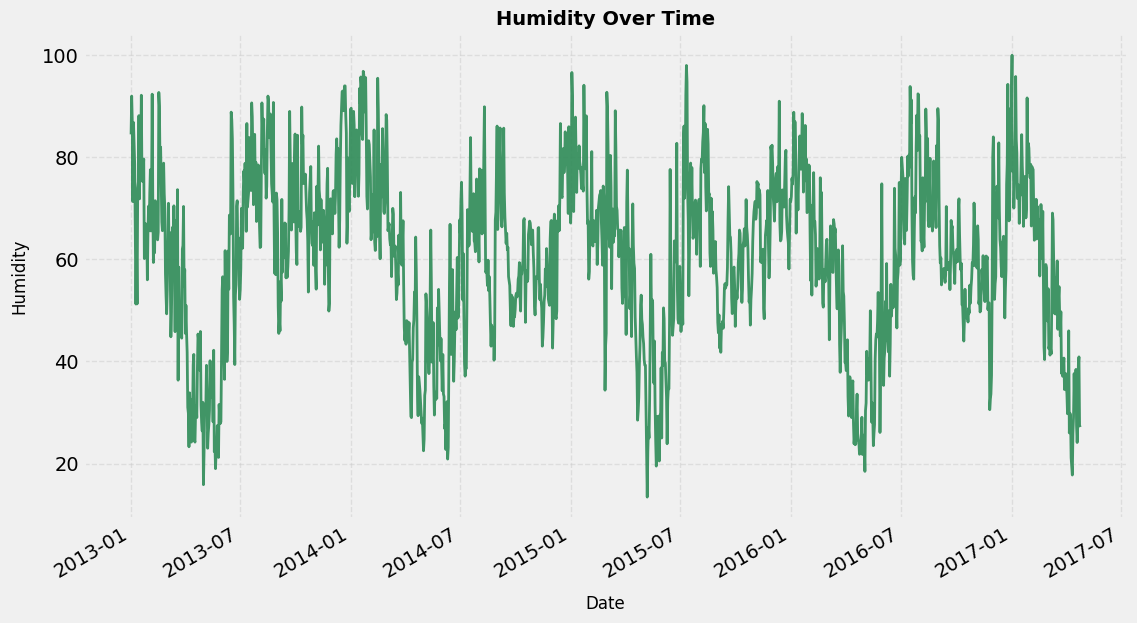

In [10]:
# Apply FiveThirtyEight Style
plt.style.use('fivethirtyeight')
#plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(full_df["humidity"], color="seagreen", linewidth=2, alpha=0.9)

plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Humidity", fontsize=12, labelpad=10)
plt.title("Humidity Over Time", fontsize=14, fontweight="bold")


plt.xticks(rotation=30, ha="right")  # Reduce rotation for readability
plt.grid(linestyle="--", alpha=0.5)  # Make the grid lines lighter
plt.show()

In [11]:
full_df["Month"] = full_df.index.month

## Box Plot

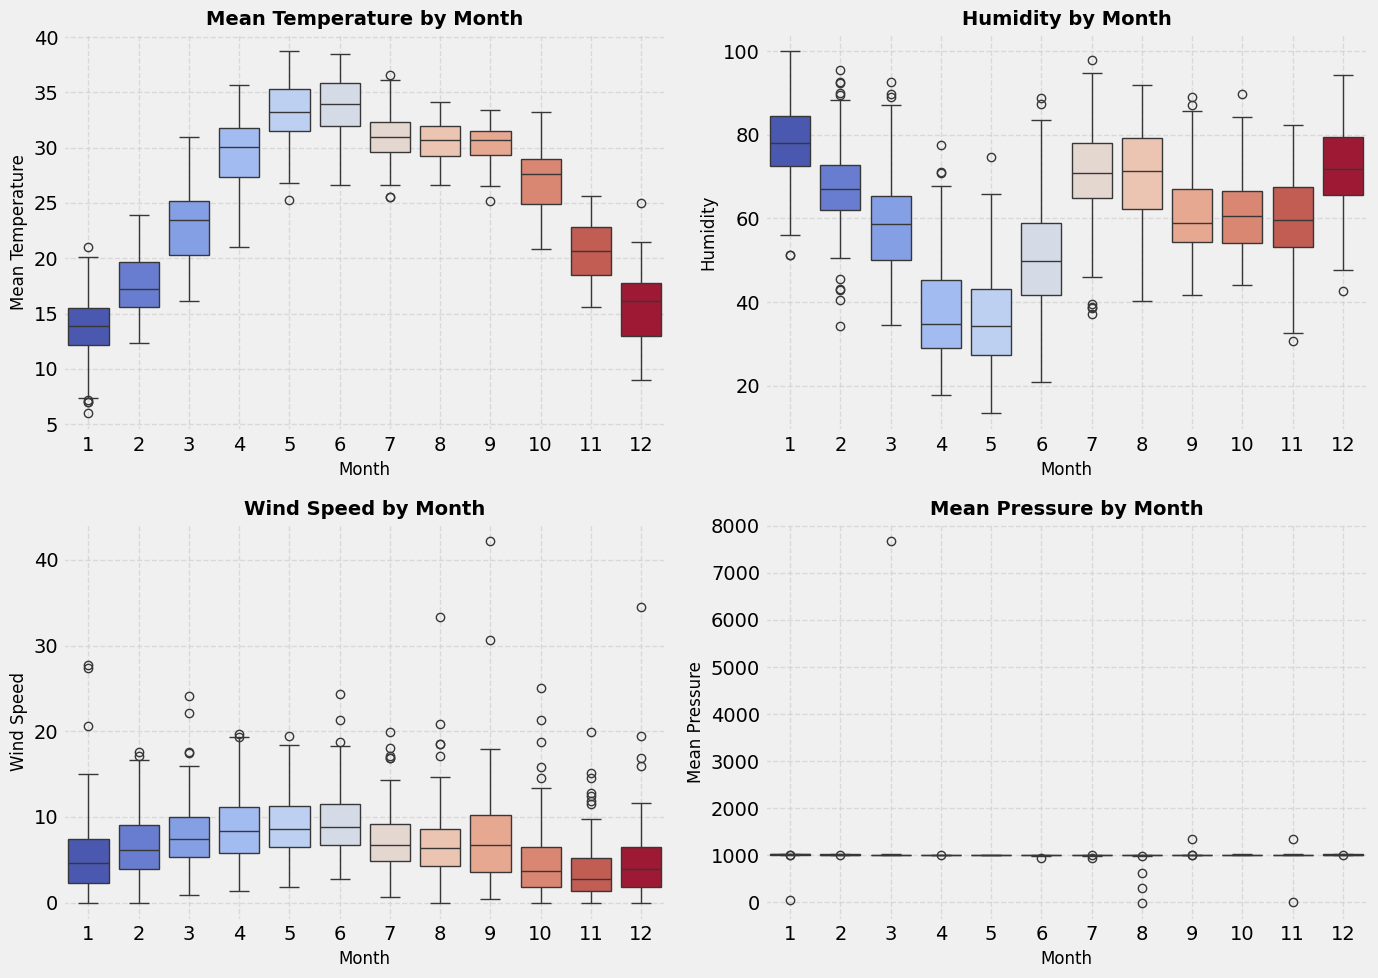

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define variables to plot
variables = ["meantemp", "humidity", "wind_speed", "meanpressure"]
titles = ["Mean Temperature", "Humidity", "Wind Speed", "Mean Pressure"]

# Create box plots for each variable grouped by month
for ax, var, title in zip(axes.flatten(), variables, titles):
    sns.boxplot(x=full_df["Month"], y=full_df[var], ax=ax, hue=full_df["Month"], palette="coolwarm", legend=False)
    ax.set_title(f"{title} by Month", fontsize=14, fontweight="bold")
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel(title, fontsize=12)
    ax.grid(linestyle="--", alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Plotting Seasonal Decompositions

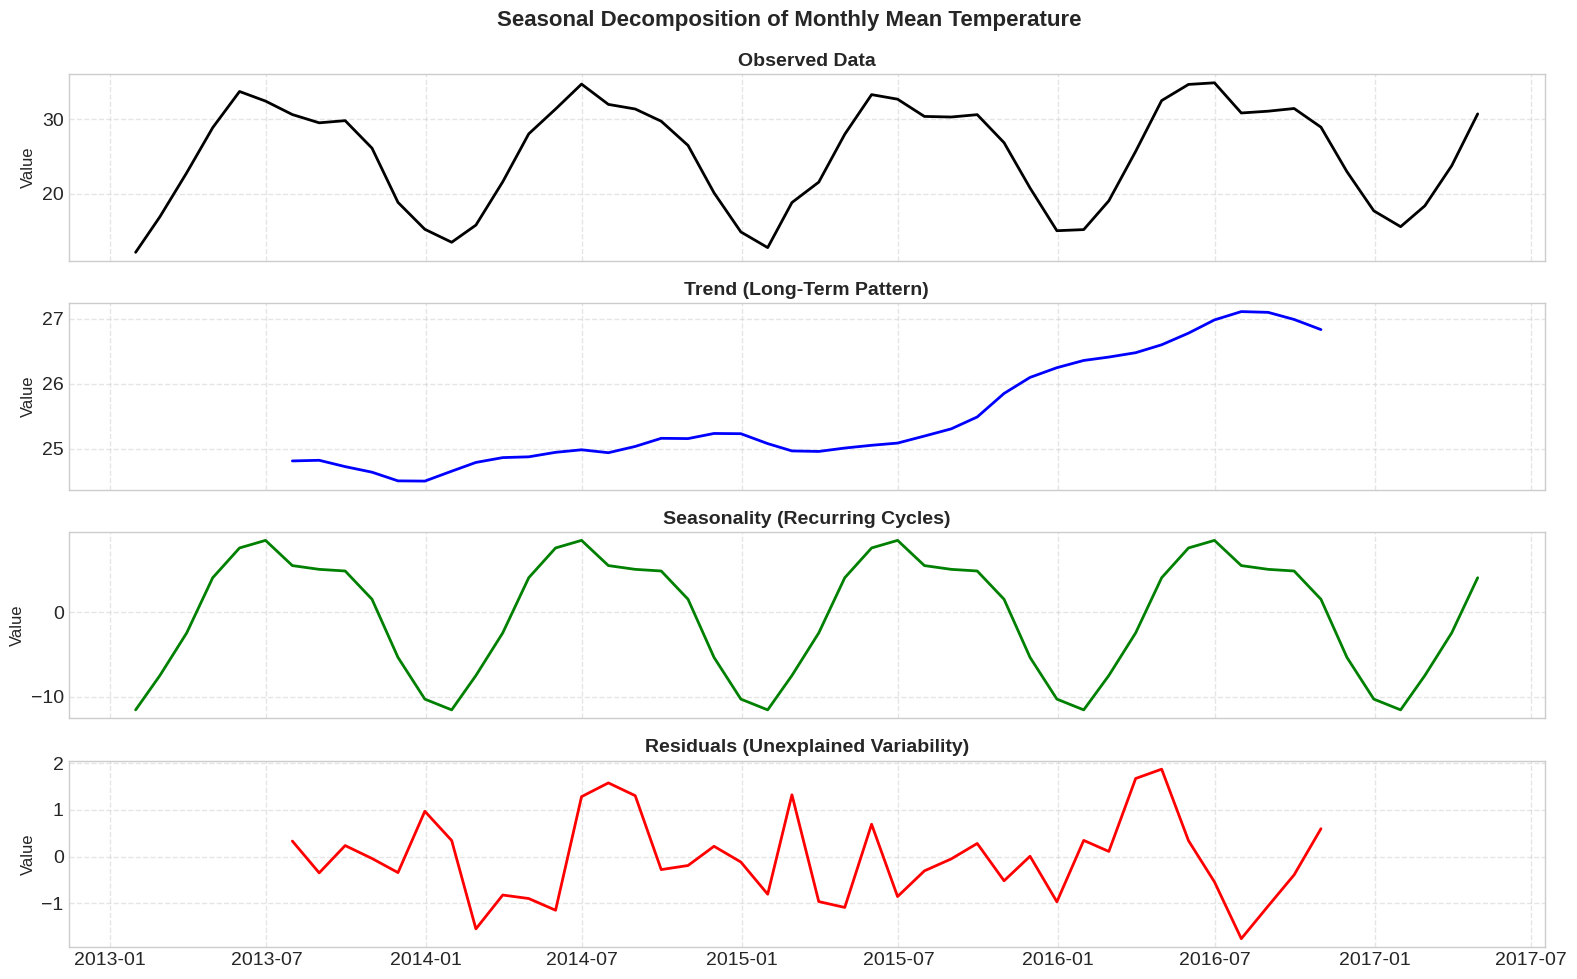

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to monthly data (Fix for 'M' deprecation)
df_monthly = full_df["meantemp"].resample('ME').mean()

# Perform seasonal decomposition
res = seasonal_decompose(df_monthly, period=12)  # Monthly seasonality assumption

# Extract components
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residual = res.resid

# Apply a clean, business-friendly style
plt.style.use("seaborn-v0_8-whitegrid")

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

# Define titles, colors, and labels
components = [observed, trend, seasonal, residual]
titles = ["Observed Data", "Trend (Long-Term Pattern)", "Seasonality (Recurring Cycles)", "Residuals (Unexplained Variability)"]
colors = ["black", "blue", "green", "red"]

# Plot each component
for ax, component, title, color in zip(axs, components, titles, colors):
    ax.plot(component, color=color, linewidth=2)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_ylabel("Value", fontsize=12)
    ax.grid(linestyle="--", alpha=0.5)

# Fix: Use `.iloc[]` to avoid future deprecation warnings
if len(trend.dropna()) > 50:  # Ensure index exists before annotating
    axs[1].annotate("Upward Trend Start", xy=(50, trend.iloc[50]), xytext=(30, trend.iloc[50] + 2),
                    arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12)

# Add overall title
fig.suptitle("Seasonal Decomposition of Monthly Mean Temperature", fontsize=16, fontweight="bold")

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
full_df["year"] = full_df.index.year

##  Temprature over the years by month

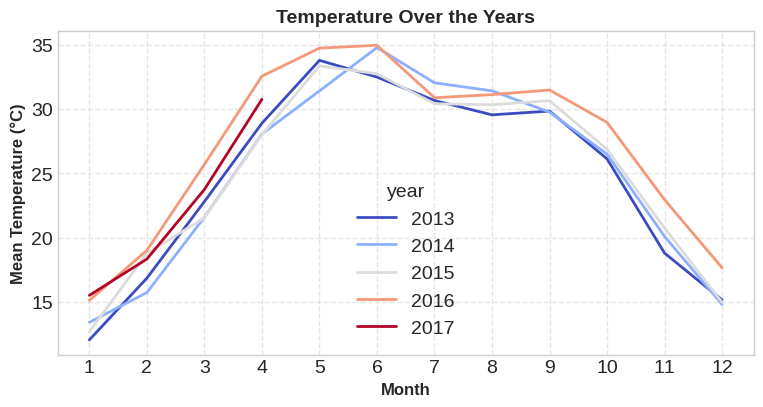

In [19]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=full_df, x="Month", y="meantemp", hue="year", linewidth=2, errorbar=None, palette="coolwarm")
plt.title("Temperature Over the Years", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Mean Temperature (°C)", fontsize=12, fontweight="bold")
plt.xticks(range(1, 13))  # Ensure only valid months (1-12) are displayed
plt.grid(linestyle="--", alpha=0.5)

# Show the plot
plt.show()

In [20]:
full_df

,meantemp,humidity,wind_speed,meanpressure,Month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013
...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,4,2017
2017-04-21,34.250000,39.375000,6.962500,999.875000,4,2017
2017-04-22,32.900000,40.900000,8.890000,1001.600000,4,2017


In [21]:
full_df["meantemp_diff"] = full_df["meantemp"].diff()

## Remove trend by differencing and check for any trend

<Axes: xlabel='date'>

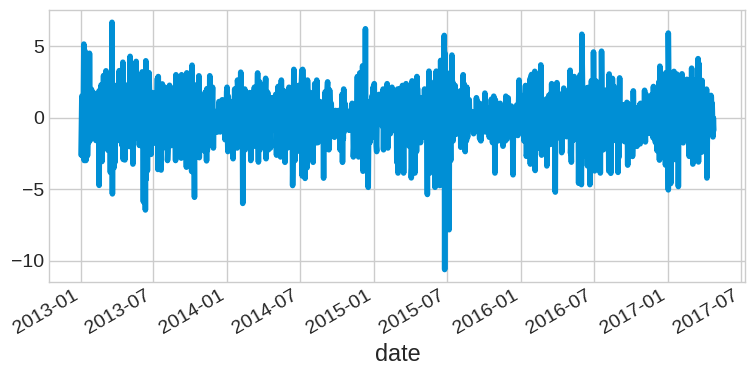

In [22]:
full_df["meantemp_diff"].plot(figsize=(8,4))

**Add a Lag-12 Feature** (One-Year Lag),

Keeps seasonal pattern so XGBoost can learn from past yearly cycles

In [23]:
# Create a 12-month lag feature to capture yearly seasonality
full_df["meantemp_lag_12"] = full_df["meantemp"].shift(12)

# Drop NaN values created by shifting
full_df = full_df.dropna()


In [25]:
full_df

,meantemp,humidity,wind_speed,meanpressure,Month,year,meantemp_diff,meantemp_lag_12
date,,,,,,,,
2013-01-13,15.833333,75.166667,4.633333,1013.333333,1,2013,1.833333,10.000000
2013-01-14,12.833333,88.166667,0.616667,1015.166667,1,2013,-3.000000,7.400000
2013-01-15,14.714286,71.857143,0.528571,1015.857143,1,2013,1.880952,7.166667
2013-01-16,13.833333,86.666667,0.000000,1016.666667,1,2013,-0.880952,8.666667
2013-01-17,16.500000,80.833333,5.250000,1015.833333,1,2013,2.666667,6.000000
...,...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,4,2017,1.000000,25.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000,4,2017,-0.250000,27.125000
2017-04-22,32.900000,40.900000,8.890000,1001.600000,4,2017,-1.350000,27.857143


## Split data using **Lag feature** method

In [26]:
# Define feature columns (excluding target)
features = ["humidity", "wind_speed", "meanpressure", "Month", "year", "meantemp_diff", "meantemp_lag_12"]
target = "meantemp"  # Predicting actual temperature

# Sort data by date (no random shuffling)
full_df = full_df.sort_index()

# Define train-test split
train_size = int(len(full_df) * 0.8)
train, test = full_df.iloc[:train_size], full_df.iloc[train_size:]

# Extract features & target
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Print dataset shapes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (1251, 7), Test set: (313, 7)


Build the **XGBOOST** model

In [27]:
from xgboost import XGBRegressor

# Initialize XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Compute metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape*100:.2f}%")


RMSE: 2.158
MAE: 1.623
MAPE: 7.29%


<ipython-input-29-2d666c95460d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")


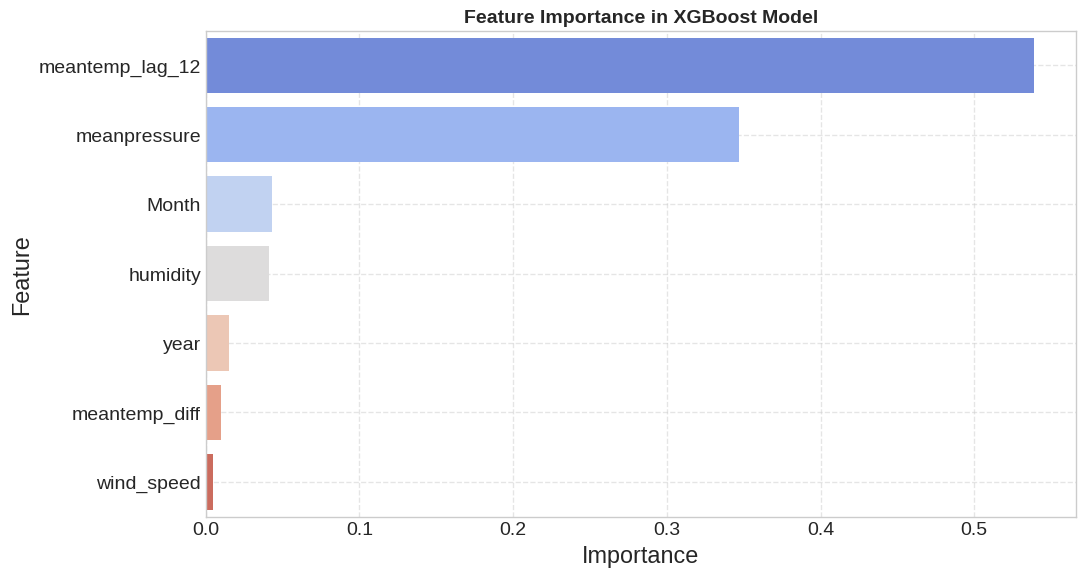

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.DataFrame({"Feature": features, "Importance": model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance in XGBoost Model", fontsize=14, fontweight="bold")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(linestyle="--", alpha=0.5)
plt.show()


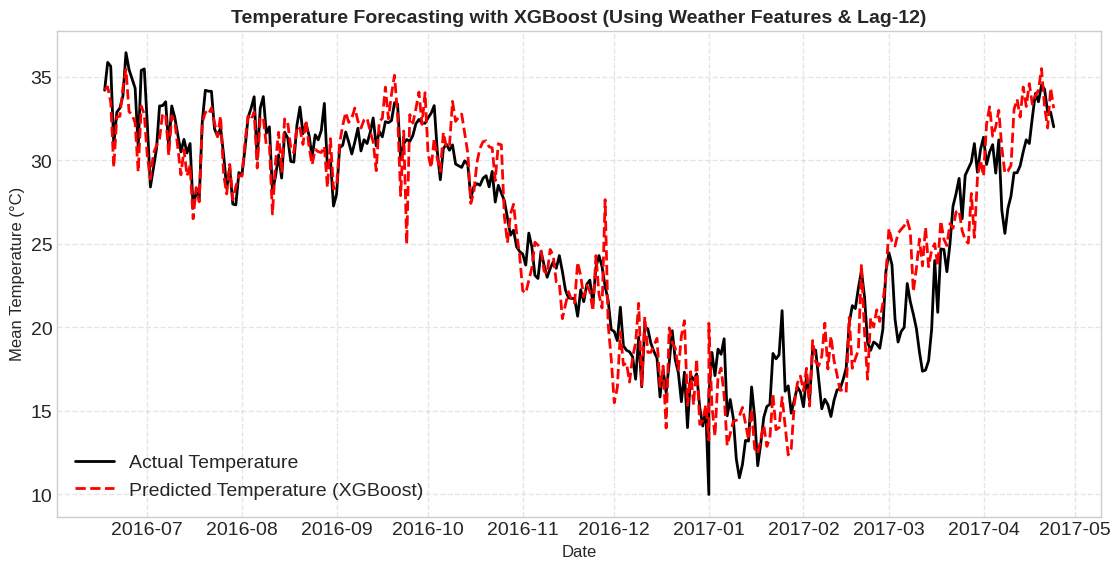

In [30]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual Temperature", color="black", linewidth=2)
plt.plot(test.index, y_pred, label="Predicted Temperature (XGBoost)", color="red", linestyle="dashed", linewidth=2)

# Labels & legend
plt.title("Temperature Forecasting with XGBoost (Using Weather Features & Lag-12)", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(linestyle="--", alpha=0.5)

plt.show()


## Split data by **Expanding window** method

In [31]:
X_train, y_train = full_df[features][:-12], full_df[target][:-12]
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
future_steps = 12  # Forecast 12 months ahead
future_dates = pd.date_range(start=full_df.index[-1], periods=future_steps+1, freq="M")[1:]

# Store predictions
future_preds = []

# Last known observation
last_obs = full_df.iloc[-1][features].values.reshape(1, -1)

for date in future_dates:
    pred = model.predict(last_obs)[0]
    future_preds.append(pred)

    # Update lag feature for the next prediction
    last_obs = np.roll(last_obs, -1)  # Shift values
    last_obs[0, -1] = pred  # Replace with new prediction


<ipython-input-32-4d64498f4033>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=full_df.index[-1], periods=future_steps+1, freq="M")[1:]


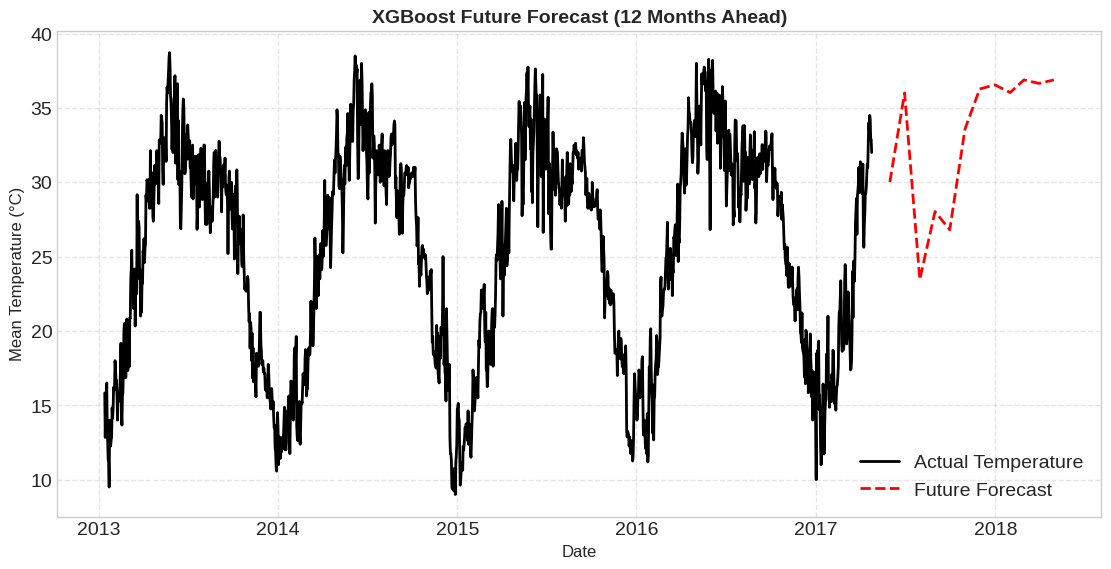

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(full_df.index, full_df[target], label="Actual Temperature", color="black", linewidth=2)
plt.plot(future_dates, future_preds, label="Future Forecast", color="red", linestyle="dashed", linewidth=2)

# Labels & legend
plt.title("XGBoost Future Forecast (12 Months Ahead)", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(linestyle="--", alpha=0.5)

plt.show()


## Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
# Define feature columns (excluding target)
features = ["humidity", "wind_speed", "meanpressure", "Month", "year", "meantemp_diff", "meantemp_lag_12"]
target = "meantemp"  # Predicting actual temperature

# Sort data by date (no random shuffling)
full_df = full_df.sort_index()

# Define train-test split
train_size = int(len(full_df) * 0.8)
train, test = full_df.iloc[:train_size], full_df.iloc[train_size:]

# Extract features & target
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Print dataset shapes
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Random Forest
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_pred = rf_model.predict(X_test)

# Compute RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.3f}")


Training set: (1251, 7), Test set: (313, 7)
Random Forest RMSE: 2.230
